In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import tensorflow_datasets as tfds

In [4]:
(train_data, test_data), info = tfds.load(
            'imdb_reviews/subwords8k',
            split = (tfds.Split.TRAIN, tfds.Split.TEST),
            as_supervised=True,
            with_info=True)

W1114 15:19:22.507352 106100 dataset_builder.py:439] Warning: Setting shuffle_files=True because split=TRAIN and shuffle_files=None. This behavior will be deprecated on 2019-08-06, at which point shuffle_files=False will be the default for all splits.


In [5]:
encoder = info.features["text"].encoder

print("Vocabulary size: {}".format(encoder.vocab_size))

Vocabulary size: 8185


In [9]:
smaple_string = "Hello TensorFlow"
encoded_string = encoder.encode(smaple_string)
print("Encoded string is {}".format(encoded_string))

original_string = encoder.decode(encoded_string)
print("The original string: '{}'".format(original_string))

assert original_string == smaple_string

Encoded string is [4025, 222, 6307, 2327, 4043, 2120]
The original string: 'Hello TensorFlow'


In [10]:
for train_example, train_label in train_data.take(1):
    print("Encoded text:", train_example[:10].numpy())
    print("Label:", train_label.numpy())

Encoded text: [2080 4956   90 7174    4 4669  190   25  162   15]
Label: 1


In [11]:
encoder.decode(train_example)

"Oh yeah! Jenna Jameson did it again! Yeah Baby! This movie rocks. It was one of the 1st movies i saw of her. And i have to say i feel in love with her, she was great in this move.<br /><br />Her performance was outstanding and what i liked the most was the scenery and the wardrobe it was amazing you can tell that they put a lot into the movie the girls cloth were amazing.<br /><br />I hope this comment helps and u can buy the movie, the storyline is awesome is very unique and i'm sure u are going to like it. Jenna amazed us once more and no wonder the movie won so many awards. Her make-up and wardrobe is very very sexy and the girls on girls scene is amazing. specially the one where she looks like an angel. It's a must see and i hope u share my interests"

In [13]:
BUFFER_SIZE = 1000
train_batches = (
        train_data
        .shuffle(BUFFER_SIZE)
        .padded_batch(32, train_data.output_shapes))

test_batches = (
        test_data
        .padded_batch(32, train_data.output_shapes))

In [15]:
for example_batch, label_batch in train_batches.take(2):
    print("Batch shape:", example_batch.shape)
    print("label shape:", label_batch.shape)

Batch shape: (32, 624)
label shape: (32,)
Batch shape: (32, 1217)
label shape: (32,)


In [16]:
model = keras.Sequential([
    keras.layers.Embedding(encoder.vocab_size, 16),
    keras.layers.GlobalAveragePooling1D(),
    keras.layers.Dense(1, activation="sigmoid")
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 16)          130960    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 17        
Total params: 130,977
Trainable params: 130,977
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.compile(optimizer="adam",
             loss="binary_crossentropy",
             metrics=["accuracy"])

In [18]:
history = model.fit(train_batches,
                   epochs=10,
                   validation_data=test_batches,
                   validation_steps=30)

Epoch 1/10


W1114 15:32:43.248171 106100 deprecation.py:323] From C:\Users\dyb\Anaconda3\lib\site-packages\tensorflow_core\python\ops\nn_impl.py:183: where (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


    174/Unknown - 1s 981ms/step - loss: 0.6955 - accuracy: 0.531 - 1s 497ms/step - loss: 0.6967 - accuracy: 0.468 - 1s 339ms/step - loss: 0.6945 - accuracy: 0.489 - 1s 260ms/step - loss: 0.6966 - accuracy: 0.453 - 1s 212ms/step - loss: 0.6948 - accuracy: 0.487 - 1s 179ms/step - loss: 0.6939 - accuracy: 0.500 - 1s 157ms/step - loss: 0.6941 - accuracy: 0.495 - 1s 139ms/step - loss: 0.6938 - accuracy: 0.500 - 1s 126ms/step - loss: 0.6930 - accuracy: 0.510 - 1s 115ms/step - loss: 0.6939 - accuracy: 0.490 - 1s 106ms/step - loss: 0.6941 - accuracy: 0.483 - 1s 99ms/step - loss: 0.6939 - accuracy: 0.487 - 1s 93ms/step - loss: 0.6937 - accuracy: 0.49 - 1s 88ms/step - loss: 0.6938 - accuracy: 0.49 - 1s 83ms/step - loss: 0.6936 - accuracy: 0.49 - 1s 80ms/step - loss: 0.6936 - accuracy: 0.49 - 1s 76ms/step - loss: 0.6935 - accuracy: 0.49 - 1s 73ms/step - loss: 0.6933 - accuracy: 0.49 - 1s 70ms/step - loss: 0.6930 - accuracy: 0.50 - 1s 68ms/step - loss: 0.6933 - accuracy: 0.50 - 1s 66ms/step - loss

    348/Unknown - 5s 28ms/step - loss: 0.6917 - accuracy: 0.53 - 5s 28ms/step - loss: 0.6917 - accuracy: 0.53 - 5s 29ms/step - loss: 0.6917 - accuracy: 0.53 - 5s 28ms/step - loss: 0.6917 - accuracy: 0.53 - 5s 28ms/step - loss: 0.6917 - accuracy: 0.53 - 5s 28ms/step - loss: 0.6917 - accuracy: 0.53 - 5s 28ms/step - loss: 0.6917 - accuracy: 0.53 - 5s 28ms/step - loss: 0.6917 - accuracy: 0.53 - 5s 28ms/step - loss: 0.6916 - accuracy: 0.53 - 5s 28ms/step - loss: 0.6916 - accuracy: 0.53 - 5s 28ms/step - loss: 0.6916 - accuracy: 0.53 - 5s 28ms/step - loss: 0.6916 - accuracy: 0.53 - 5s 28ms/step - loss: 0.6916 - accuracy: 0.53 - 5s 28ms/step - loss: 0.6916 - accuracy: 0.53 - 5s 28ms/step - loss: 0.6916 - accuracy: 0.53 - 5s 28ms/step - loss: 0.6915 - accuracy: 0.54 - 5s 28ms/step - loss: 0.6915 - accuracy: 0.53 - 5s 28ms/step - loss: 0.6915 - accuracy: 0.54 - 5s 28ms/step - loss: 0.6915 - accuracy: 0.53 - 5s 28ms/step - loss: 0.6915 - accuracy: 0.54 - 5s 28ms/step - loss: 0.6915 - accuracy: 0.

    517/Unknown - 9s 25ms/step - loss: 0.6897 - accuracy: 0.56 - 9s 25ms/step - loss: 0.6897 - accuracy: 0.56 - 9s 25ms/step - loss: 0.6897 - accuracy: 0.57 - 9s 25ms/step - loss: 0.6897 - accuracy: 0.57 - 9s 25ms/step - loss: 0.6897 - accuracy: 0.57 - 9s 25ms/step - loss: 0.6897 - accuracy: 0.57 - 9s 25ms/step - loss: 0.6896 - accuracy: 0.57 - 9s 25ms/step - loss: 0.6896 - accuracy: 0.57 - 9s 25ms/step - loss: 0.6896 - accuracy: 0.57 - 9s 25ms/step - loss: 0.6896 - accuracy: 0.57 - 9s 25ms/step - loss: 0.6896 - accuracy: 0.57 - 9s 25ms/step - loss: 0.6896 - accuracy: 0.57 - 9s 25ms/step - loss: 0.6895 - accuracy: 0.57 - 9s 25ms/step - loss: 0.6895 - accuracy: 0.57 - 9s 24ms/step - loss: 0.6895 - accuracy: 0.57 - 9s 24ms/step - loss: 0.6895 - accuracy: 0.57 - 9s 24ms/step - loss: 0.6895 - accuracy: 0.57 - 9s 24ms/step - loss: 0.6894 - accuracy: 0.57 - 9s 24ms/step - loss: 0.6894 - accuracy: 0.57 - 9s 24ms/step - loss: 0.6894 - accuracy: 0.57 - 9s 24ms/step - loss: 0.6894 - accuracy: 0.

    684/Unknown - 12s 23ms/step - loss: 0.6869 - accuracy: 0.610 - 12s 23ms/step - loss: 0.6869 - accuracy: 0.610 - 12s 24ms/step - loss: 0.6869 - accuracy: 0.610 - 12s 24ms/step - loss: 0.6868 - accuracy: 0.610 - 12s 24ms/step - loss: 0.6868 - accuracy: 0.611 - 12s 24ms/step - loss: 0.6868 - accuracy: 0.611 - 12s 24ms/step - loss: 0.6868 - accuracy: 0.611 - 12s 24ms/step - loss: 0.6867 - accuracy: 0.612 - 12s 24ms/step - loss: 0.6867 - accuracy: 0.612 - 12s 24ms/step - loss: 0.6867 - accuracy: 0.612 - 12s 24ms/step - loss: 0.6867 - accuracy: 0.612 - 12s 24ms/step - loss: 0.6866 - accuracy: 0.612 - 12s 23ms/step - loss: 0.6866 - accuracy: 0.612 - 12s 23ms/step - loss: 0.6866 - accuracy: 0.612 - 12s 23ms/step - loss: 0.6866 - accuracy: 0.612 - 13s 23ms/step - loss: 0.6866 - accuracy: 0.612 - 13s 23ms/step - loss: 0.6866 - accuracy: 0.613 - 13s 23ms/step - loss: 0.6866 - accuracy: 0.612 - 13s 23ms/step - loss: 0.6866 - accuracy: 0.612 - 13s 23ms/step - loss: 0.6865 - accuracy: 0.612 - 13

782/782 [==============================]0.6832 - accuracy: 0.629 - 16s 24ms/step - loss: 0.6832 - accuracy: 0.629 - 16s 24ms/step - loss: 0.6831 - accuracy: 0.629 - 16s 24ms/step - loss: 0.6831 - accuracy: 0.630 - 16s 24ms/step - loss: 0.6831 - accuracy: 0.630 - 16s 24ms/step - loss: 0.6831 - accuracy: 0.630 - 16s 24ms/step - loss: 0.6830 - accuracy: 0.630 - 16s 24ms/step - loss: 0.6830 - accuracy: 0.630 - 16s 24ms/step - loss: 0.6830 - accuracy: 0.631 - 16s 24ms/step - loss: 0.6829 - accuracy: 0.631 - 17s 24ms/step - loss: 0.6829 - accuracy: 0.631 - 17s 24ms/step - loss: 0.6829 - accuracy: 0.631 - 17s 24ms/step - loss: 0.6828 - accuracy: 0.632 - 17s 24ms/step - loss: 0.6828 - accuracy: 0.632 - 17s 24ms/step - loss: 0.6828 - accuracy: 0.632 - 17s 24ms/step - loss: 0.6827 - accuracy: 0.632 - 17s 24ms/step - loss: 0.6827 - accuracy: 0.632 - 17s 24ms/step - loss: 0.6827 - accuracy: 0.632 - 17s 24ms/step - loss: 0.6827 - accuracy: 0.632 - 17s 24ms/step - loss: 0.6826 - accuracy: 0.632 - 17

738/782 [===========================>..] - ETA: 2:18 - loss: 0.6784 - accuracy: 0.62 - ETA: 35s - loss: 0.6629 - accuracy: 0.7000 - ETA: 25s - loss: 0.6616 - accuracy: 0.708 - ETA: 20s - loss: 0.6597 - accuracy: 0.713 - ETA: 17s - loss: 0.6586 - accuracy: 0.722 - ETA: 16s - loss: 0.6573 - accuracy: 0.733 - ETA: 15s - loss: 0.6582 - accuracy: 0.732 - ETA: 14s - loss: 0.6574 - accuracy: 0.732 - ETA: 13s - loss: 0.6573 - accuracy: 0.728 - ETA: 13s - loss: 0.6571 - accuracy: 0.731 - ETA: 13s - loss: 0.6572 - accuracy: 0.738 - ETA: 12s - loss: 0.6572 - accuracy: 0.739 - ETA: 12s - loss: 0.6569 - accuracy: 0.738 - ETA: 12s - loss: 0.6566 - accuracy: 0.739 - ETA: 12s - loss: 0.6561 - accuracy: 0.742 - ETA: 12s - loss: 0.6556 - accuracy: 0.741 - ETA: 12s - loss: 0.6554 - accuracy: 0.739 - ETA: 12s - loss: 0.6558 - accuracy: 0.737 - ETA: 12s - loss: 0.6558 - accuracy: 0.737 - ETA: 12s - loss: 0.6558 - accuracy: 0.737 - ETA: 12s - loss: 0.6554 - accuracy: 0.739 - ETA: 12s - loss: 0.6547 - accura

782/782 [==============================] - ETA: 0s - loss: 0.6225 - accuracy: 0.75 - ETA: 0s - loss: 0.6223 - accuracy: 0.75 - ETA: 0s - loss: 0.6221 - accuracy: 0.75 - ETA: 0s - loss: 0.6218 - accuracy: 0.75 - ETA: 0s - loss: 0.6215 - accuracy: 0.75 - ETA: 0s - loss: 0.6212 - accuracy: 0.75 - ETA: 0s - loss: 0.6207 - accuracy: 0.75 - ETA: 0s - loss: 0.6203 - accuracy: 0.75 - ETA: 0s - loss: 0.6202 - accuracy: 0.75 - ETA: 0s - loss: 0.6199 - accuracy: 0.75 - 12s 15ms/step - loss: 0.6199 - accuracy: 0.7551 - val_loss: 0.5938 - val_accuracy: 0.7906
Epoch 3/10


757/782 [============================>.] - ETA: 1:43 - loss: 0.5635 - accuracy: 0.84 - ETA: 29s - loss: 0.5758 - accuracy: 0.8188 - ETA: 22s - loss: 0.5749 - accuracy: 0.798 - ETA: 18s - loss: 0.5748 - accuracy: 0.783 - ETA: 16s - loss: 0.5666 - accuracy: 0.786 - ETA: 15s - loss: 0.5712 - accuracy: 0.778 - ETA: 14s - loss: 0.5708 - accuracy: 0.786 - ETA: 14s - loss: 0.5741 - accuracy: 0.786 - ETA: 13s - loss: 0.5720 - accuracy: 0.791 - ETA: 12s - loss: 0.5713 - accuracy: 0.792 - ETA: 12s - loss: 0.5721 - accuracy: 0.790 - ETA: 11s - loss: 0.5718 - accuracy: 0.794 - ETA: 11s - loss: 0.5733 - accuracy: 0.792 - ETA: 11s - loss: 0.5740 - accuracy: 0.788 - ETA: 11s - loss: 0.5711 - accuracy: 0.789 - ETA: 11s - loss: 0.5720 - accuracy: 0.788 - ETA: 11s - loss: 0.5726 - accuracy: 0.787 - ETA: 10s - loss: 0.5714 - accuracy: 0.783 - ETA: 10s - loss: 0.5695 - accuracy: 0.786 - ETA: 10s - loss: 0.5700 - accuracy: 0.785 - ETA: 10s - loss: 0.5695 - accuracy: 0.785 - ETA: 10s - loss: 0.5688 - accura

782/782 [==============================] - ETA: 0s - loss: 0.5435 - accuracy: 0.80 - ETA: 0s - loss: 0.5434 - accuracy: 0.80 - ETA: 0s - loss: 0.5432 - accuracy: 0.80 - ETA: 0s - loss: 0.5429 - accuracy: 0.80 - ETA: 0s - loss: 0.5427 - accuracy: 0.80 - 12s 15ms/step - loss: 0.5427 - accuracy: 0.8068 - val_loss: 0.5303 - val_accuracy: 0.8094
Epoch 4/10
782/782 [==============================] - ETA: 2:03 - loss: 0.5342 - accuracy: 0.84 - ETA: 32s - loss: 0.5278 - accuracy: 0.7812 - ETA: 25s - loss: 0.5336 - accuracy: 0.781 - ETA: 20s - loss: 0.5281 - accuracy: 0.799 - ETA: 17s - loss: 0.5174 - accuracy: 0.791 - ETA: 16s - loss: 0.5165 - accuracy: 0.792 - ETA: 15s - loss: 0.5093 - accuracy: 0.807 - ETA: 14s - loss: 0.5072 - accuracy: 0.812 - ETA: 13s - loss: 0.5020 - accuracy: 0.819 - ETA: 12s - loss: 0.5050 - accuracy: 0.816 - ETA: 12s - loss: 0.5048 - accuracy: 0.813 - ETA: 12s - loss: 0.5027 - accuracy: 0.815 - ETA: 11s - loss: 0.5012 - accuracy: 0.816 - ETA: 11s - loss: 0.5001 - accu

782/782 [==============================] - ETA: 1:55 - loss: 0.4198 - accuracy: 0.84 - ETA: 31s - loss: 0.4551 - accuracy: 0.8438 - ETA: 22s - loss: 0.4484 - accuracy: 0.847 - ETA: 17s - loss: 0.4455 - accuracy: 0.852 - ETA: 15s - loss: 0.4449 - accuracy: 0.852 - ETA: 13s - loss: 0.4413 - accuracy: 0.845 - ETA: 12s - loss: 0.4445 - accuracy: 0.844 - ETA: 12s - loss: 0.4462 - accuracy: 0.845 - ETA: 12s - loss: 0.4469 - accuracy: 0.843 - ETA: 11s - loss: 0.4423 - accuracy: 0.846 - ETA: 11s - loss: 0.4421 - accuracy: 0.849 - ETA: 10s - loss: 0.4426 - accuracy: 0.849 - ETA: 10s - loss: 0.4397 - accuracy: 0.853 - ETA: 10s - loss: 0.4426 - accuracy: 0.851 - ETA: 10s - loss: 0.4432 - accuracy: 0.852 - ETA: 10s - loss: 0.4436 - accuracy: 0.854 - ETA: 9s - loss: 0.4425 - accuracy: 0.852 - ETA: 9s - loss: 0.4433 - accuracy: 0.85 - ETA: 9s - loss: 0.4431 - accuracy: 0.85 - ETA: 9s - loss: 0.4420 - accuracy: 0.85 - ETA: 9s - loss: 0.4425 - accuracy: 0.85 - ETA: 9s - loss: 0.4442 - accuracy: 0.84 -

782/782 [==============================] - ETA: 2:07 - loss: 0.3475 - accuracy: 0.90 - ETA: 28s - loss: 0.3644 - accuracy: 0.8646 - ETA: 21s - loss: 0.3493 - accuracy: 0.881 - ETA: 18s - loss: 0.3792 - accuracy: 0.863 - ETA: 17s - loss: 0.3845 - accuracy: 0.867 - ETA: 15s - loss: 0.3761 - accuracy: 0.867 - ETA: 14s - loss: 0.3857 - accuracy: 0.866 - ETA: 14s - loss: 0.3875 - accuracy: 0.867 - ETA: 13s - loss: 0.3941 - accuracy: 0.861 - ETA: 13s - loss: 0.3958 - accuracy: 0.860 - ETA: 12s - loss: 0.3944 - accuracy: 0.861 - ETA: 12s - loss: 0.3956 - accuracy: 0.862 - ETA: 11s - loss: 0.3944 - accuracy: 0.860 - ETA: 11s - loss: 0.3960 - accuracy: 0.861 - ETA: 11s - loss: 0.3946 - accuracy: 0.865 - ETA: 11s - loss: 0.3943 - accuracy: 0.865 - ETA: 11s - loss: 0.3957 - accuracy: 0.863 - ETA: 10s - loss: 0.3964 - accuracy: 0.864 - ETA: 10s - loss: 0.3962 - accuracy: 0.866 - ETA: 10s - loss: 0.3960 - accuracy: 0.866 - ETA: 10s - loss: 0.3963 - accuracy: 0.867 - ETA: 10s - loss: 0.3960 - accura

782/782 [==============================] - ETA: 1:42 - loss: 0.4062 - accuracy: 0.84 - ETA: 25s - loss: 0.3829 - accuracy: 0.8542 - ETA: 19s - loss: 0.3625 - accuracy: 0.868 - ETA: 15s - loss: 0.3812 - accuracy: 0.856 - ETA: 14s - loss: 0.3706 - accuracy: 0.873 - ETA: 13s - loss: 0.3704 - accuracy: 0.873 - ETA: 13s - loss: 0.3737 - accuracy: 0.870 - ETA: 12s - loss: 0.3705 - accuracy: 0.872 - ETA: 12s - loss: 0.3753 - accuracy: 0.867 - ETA: 12s - loss: 0.3779 - accuracy: 0.868 - ETA: 11s - loss: 0.3759 - accuracy: 0.867 - ETA: 11s - loss: 0.3716 - accuracy: 0.871 - ETA: 11s - loss: 0.3705 - accuracy: 0.875 - ETA: 11s - loss: 0.3714 - accuracy: 0.873 - ETA: 11s - loss: 0.3743 - accuracy: 0.875 - ETA: 11s - loss: 0.3729 - accuracy: 0.876 - ETA: 10s - loss: 0.3710 - accuracy: 0.875 - ETA: 10s - loss: 0.3695 - accuracy: 0.875 - ETA: 10s - loss: 0.3673 - accuracy: 0.877 - ETA: 10s - loss: 0.3653 - accuracy: 0.878 - ETA: 10s - loss: 0.3659 - accuracy: 0.876 - ETA: 9s - loss: 0.3634 - accurac

782/782 [==============================] - ETA: 1:59 - loss: 0.2927 - accuracy: 0.90 - ETA: 27s - loss: 0.3089 - accuracy: 0.8750 - ETA: 20s - loss: 0.3171 - accuracy: 0.881 - ETA: 18s - loss: 0.3323 - accuracy: 0.867 - ETA: 16s - loss: 0.3282 - accuracy: 0.866 - ETA: 14s - loss: 0.3332 - accuracy: 0.872 - ETA: 13s - loss: 0.3388 - accuracy: 0.872 - ETA: 13s - loss: 0.3462 - accuracy: 0.874 - ETA: 12s - loss: 0.3428 - accuracy: 0.881 - ETA: 12s - loss: 0.3429 - accuracy: 0.880 - ETA: 11s - loss: 0.3444 - accuracy: 0.880 - ETA: 11s - loss: 0.3382 - accuracy: 0.883 - ETA: 11s - loss: 0.3414 - accuracy: 0.880 - ETA: 11s - loss: 0.3412 - accuracy: 0.882 - ETA: 11s - loss: 0.3406 - accuracy: 0.883 - ETA: 10s - loss: 0.3404 - accuracy: 0.884 - ETA: 10s - loss: 0.3383 - accuracy: 0.885 - ETA: 10s - loss: 0.3373 - accuracy: 0.887 - ETA: 10s - loss: 0.3359 - accuracy: 0.888 - ETA: 10s - loss: 0.3349 - accuracy: 0.887 - ETA: 10s - loss: 0.3359 - accuracy: 0.886 - ETA: 10s - loss: 0.3360 - accura

782/782 [==============================] - ETA: 1:59 - loss: 0.3694 - accuracy: 0.84 - ETA: 32s - loss: 0.2900 - accuracy: 0.9250 - ETA: 20s - loss: 0.3040 - accuracy: 0.900 - ETA: 16s - loss: 0.3119 - accuracy: 0.885 - ETA: 14s - loss: 0.3266 - accuracy: 0.879 - ETA: 13s - loss: 0.3244 - accuracy: 0.882 - ETA: 13s - loss: 0.3289 - accuracy: 0.879 - ETA: 12s - loss: 0.3199 - accuracy: 0.888 - ETA: 12s - loss: 0.3168 - accuracy: 0.892 - ETA: 11s - loss: 0.3219 - accuracy: 0.884 - ETA: 11s - loss: 0.3173 - accuracy: 0.886 - ETA: 11s - loss: 0.3191 - accuracy: 0.885 - ETA: 11s - loss: 0.3220 - accuracy: 0.883 - ETA: 10s - loss: 0.3176 - accuracy: 0.887 - ETA: 11s - loss: 0.3207 - accuracy: 0.885 - ETA: 10s - loss: 0.3211 - accuracy: 0.884 - ETA: 10s - loss: 0.3187 - accuracy: 0.886 - ETA: 10s - loss: 0.3163 - accuracy: 0.887 - ETA: 10s - loss: 0.3173 - accuracy: 0.887 - ETA: 10s - loss: 0.3165 - accuracy: 0.889 - ETA: 10s - loss: 0.3153 - accuracy: 0.890 - ETA: 9s - loss: 0.3155 - accurac

782/782 [==============================] - ETA: 1:58 - loss: 0.3372 - accuracy: 0.87 - ETA: 31s - loss: 0.2747 - accuracy: 0.9187 - ETA: 22s - loss: 0.3128 - accuracy: 0.892 - ETA: 17s - loss: 0.3043 - accuracy: 0.888 - ETA: 16s - loss: 0.3032 - accuracy: 0.890 - ETA: 15s - loss: 0.3033 - accuracy: 0.889 - ETA: 14s - loss: 0.3055 - accuracy: 0.888 - ETA: 13s - loss: 0.3052 - accuracy: 0.887 - ETA: 12s - loss: 0.2944 - accuracy: 0.896 - ETA: 12s - loss: 0.2935 - accuracy: 0.897 - ETA: 11s - loss: 0.2958 - accuracy: 0.896 - ETA: 11s - loss: 0.2941 - accuracy: 0.898 - ETA: 11s - loss: 0.2970 - accuracy: 0.896 - ETA: 11s - loss: 0.3013 - accuracy: 0.893 - ETA: 11s - loss: 0.3009 - accuracy: 0.894 - ETA: 10s - loss: 0.3005 - accuracy: 0.895 - ETA: 10s - loss: 0.2990 - accuracy: 0.896 - ETA: 10s - loss: 0.3002 - accuracy: 0.897 - ETA: 10s - loss: 0.2991 - accuracy: 0.897 - ETA: 10s - loss: 0.3011 - accuracy: 0.896 - ETA: 10s - loss: 0.2979 - accuracy: 0.897 - ETA: 10s - loss: 0.2990 - accura

In [19]:
loss, accuracy = model.evaluate(test_batches)

print("Loss:", loss)
print("Accuracy: ", accuracy)

    174/Unknown - 0s 44ms/step - loss: 0.4005 - accuracy: 0.78 - 0s 27ms/step - loss: 0.3882 - accuracy: 0.84 - 0s 23ms/step - loss: 0.4135 - accuracy: 0.86 - 0s 19ms/step - loss: 0.4093 - accuracy: 0.86 - 0s 18ms/step - loss: 0.3703 - accuracy: 0.88 - 0s 16ms/step - loss: 0.3593 - accuracy: 0.88 - 0s 15ms/step - loss: 0.3410 - accuracy: 0.88 - 0s 14ms/step - loss: 0.3496 - accuracy: 0.87 - 0s 14ms/step - loss: 0.3549 - accuracy: 0.87 - 0s 13ms/step - loss: 0.3463 - accuracy: 0.87 - 0s 13ms/step - loss: 0.3394 - accuracy: 0.87 - 0s 13ms/step - loss: 0.3340 - accuracy: 0.87 - 0s 12ms/step - loss: 0.3422 - accuracy: 0.87 - 0s 12ms/step - loss: 0.3382 - accuracy: 0.87 - 0s 12ms/step - loss: 0.3366 - accuracy: 0.87 - 0s 12ms/step - loss: 0.3427 - accuracy: 0.87 - 0s 11ms/step - loss: 0.3401 - accuracy: 0.87 - 0s 11ms/step - loss: 0.3391 - accuracy: 0.87 - 0s 11ms/step - loss: 0.3416 - accuracy: 0.87 - 0s 11ms/step - loss: 0.3351 - accuracy: 0.87 - 0s 11ms/step - loss: 0.3334 - accuracy: 0.

    348/Unknown - 2s 9ms/step - loss: 0.3431 - accuracy: 0.869 - 2s 9ms/step - loss: 0.3424 - accuracy: 0.869 - 2s 9ms/step - loss: 0.3422 - accuracy: 0.869 - 2s 9ms/step - loss: 0.3420 - accuracy: 0.869 - 2s 9ms/step - loss: 0.3417 - accuracy: 0.869 - 2s 9ms/step - loss: 0.3421 - accuracy: 0.869 - 2s 9ms/step - loss: 0.3417 - accuracy: 0.869 - 2s 9ms/step - loss: 0.3409 - accuracy: 0.869 - 2s 9ms/step - loss: 0.3411 - accuracy: 0.869 - 2s 9ms/step - loss: 0.3413 - accuracy: 0.868 - 2s 9ms/step - loss: 0.3412 - accuracy: 0.868 - 2s 9ms/step - loss: 0.3414 - accuracy: 0.868 - 2s 9ms/step - loss: 0.3409 - accuracy: 0.868 - 2s 9ms/step - loss: 0.3413 - accuracy: 0.868 - 2s 9ms/step - loss: 0.3415 - accuracy: 0.868 - 2s 9ms/step - loss: 0.3419 - accuracy: 0.868 - 2s 9ms/step - loss: 0.3426 - accuracy: 0.867 - 2s 9ms/step - loss: 0.3432 - accuracy: 0.867 - 2s 9ms/step - loss: 0.3429 - accuracy: 0.868 - 2s 9ms/step - loss: 0.3422 - accuracy: 0.868 - 2s 9ms/step - loss: 0.3417 - accuracy: 0.8

    522/Unknown - 3s 9ms/step - loss: 0.3365 - accuracy: 0.872 - 3s 9ms/step - loss: 0.3367 - accuracy: 0.872 - 3s 9ms/step - loss: 0.3363 - accuracy: 0.872 - 3s 9ms/step - loss: 0.3362 - accuracy: 0.872 - 3s 9ms/step - loss: 0.3364 - accuracy: 0.872 - 3s 9ms/step - loss: 0.3364 - accuracy: 0.872 - 3s 9ms/step - loss: 0.3371 - accuracy: 0.872 - 3s 9ms/step - loss: 0.3376 - accuracy: 0.872 - 3s 9ms/step - loss: 0.3377 - accuracy: 0.872 - 3s 9ms/step - loss: 0.3376 - accuracy: 0.871 - 3s 9ms/step - loss: 0.3373 - accuracy: 0.872 - 3s 9ms/step - loss: 0.3371 - accuracy: 0.872 - 3s 9ms/step - loss: 0.3369 - accuracy: 0.872 - 3s 9ms/step - loss: 0.3371 - accuracy: 0.872 - 3s 9ms/step - loss: 0.3369 - accuracy: 0.872 - 3s 9ms/step - loss: 0.3368 - accuracy: 0.872 - 3s 9ms/step - loss: 0.3368 - accuracy: 0.872 - 3s 9ms/step - loss: 0.3366 - accuracy: 0.872 - 3s 9ms/step - loss: 0.3365 - accuracy: 0.872 - 3s 9ms/step - loss: 0.3364 - accuracy: 0.872 - 3s 9ms/step - loss: 0.3363 - accuracy: 0.8

    696/Unknown - 5s 9ms/step - loss: 0.3348 - accuracy: 0.872 - 5s 9ms/step - loss: 0.3347 - accuracy: 0.872 - 5s 9ms/step - loss: 0.3347 - accuracy: 0.872 - 5s 9ms/step - loss: 0.3347 - accuracy: 0.872 - 5s 9ms/step - loss: 0.3346 - accuracy: 0.872 - 5s 9ms/step - loss: 0.3342 - accuracy: 0.872 - 5s 9ms/step - loss: 0.3342 - accuracy: 0.872 - 5s 9ms/step - loss: 0.3342 - accuracy: 0.872 - 5s 9ms/step - loss: 0.3343 - accuracy: 0.872 - 5s 9ms/step - loss: 0.3342 - accuracy: 0.872 - 5s 9ms/step - loss: 0.3342 - accuracy: 0.872 - 5s 9ms/step - loss: 0.3341 - accuracy: 0.872 - 5s 9ms/step - loss: 0.3342 - accuracy: 0.872 - 5s 9ms/step - loss: 0.3341 - accuracy: 0.872 - 5s 9ms/step - loss: 0.3338 - accuracy: 0.872 - 5s 9ms/step - loss: 0.3339 - accuracy: 0.872 - 5s 9ms/step - loss: 0.3342 - accuracy: 0.872 - 5s 9ms/step - loss: 0.3343 - accuracy: 0.872 - 5s 9ms/step - loss: 0.3341 - accuracy: 0.872 - 5s 9ms/step - loss: 0.3340 - accuracy: 0.872 - 5s 9ms/step - loss: 0.3341 - accuracy: 0.8

782/782 [==============================]3334 - accuracy: 0.873 - 7s 9ms/step - loss: 0.3334 - accuracy: 0.872 - 7s 9ms/step - loss: 0.3331 - accuracy: 0.873 - 7s 9ms/step - loss: 0.3334 - accuracy: 0.872 - 7s 9ms/step - loss: 0.3333 - accuracy: 0.872 - 7s 9ms/step - loss: 0.3334 - accuracy: 0.872 - 7s 9ms/step - loss: 0.3331 - accuracy: 0.873 - 7s 9ms/step - loss: 0.3331 - accuracy: 0.872 - 7s 9ms/step - loss: 0.3331 - accuracy: 0.873 - 7s 9ms/step - loss: 0.3328 - accuracy: 0.873 - 7s 9ms/step - loss: 0.3327 - accuracy: 0.873 - 7s 9ms/step - loss: 0.3328 - accuracy: 0.873 - 7s 9ms/step - loss: 0.3327 - accuracy: 0.873 - 7s 9ms/step - loss: 0.3326 - accuracy: 0.873 - 7s 9ms/step - loss: 0.3325 - accuracy: 0.873 - 7s 9ms/step - loss: 0.3325 - accuracy: 0.873 - 7s 9ms/step - loss: 0.3325 - accuracy: 0.873 - 7s 9ms/step - loss: 0.3325 - accuracy: 0.873 - 7s 9ms/step - loss: 0.3326 - accuracy: 0.873 - 7s 9ms/step - loss: 0.3324 - accuracy: 0.873 - 7s 9ms/step - loss: 0.3332 - accuracy: 0.8

In [20]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

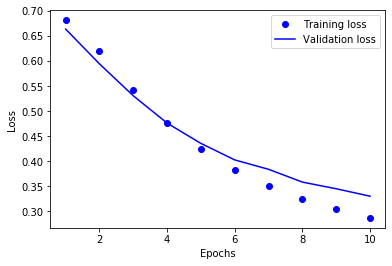

In [24]:
import matplotlib.pyplot as plt

acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
loss = history_dict["loss"]
val_loss = history_dict["val_loss"]

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'bo', label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()


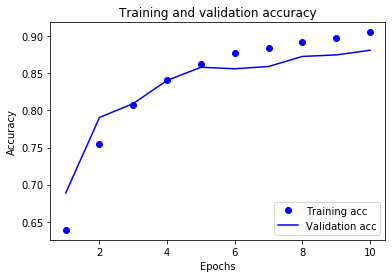

In [25]:
plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.show()